In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SIMION_utils as su
import importlib
import pandas as pd


Bad key text.latex.preview in file C:\Users\Tom\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Tom\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Tom\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably ne

In [2]:
# From set 16 on - looking at changing the size of the rings

In [5]:
base = 'C:/Users/Tom/Documents/Yale/SIMION/projects/data/'
files = ['set16', 'set17', 'set18', 'set19', 'set20', 'set21', 'set22', 'set23', 'set24']
ftype = '.csv'
#filename = base+files[0]+ftype
#data = pd.read_csv(filename, names=list('abcdefghij')) 

In [6]:
effs = []
errs = []
cs = [6.5, 7.5, 5.5, 4.5, 8.5, 9.5, 7.5, 7.5, 6.5]
for q, file in enumerate(files):
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    if file == 'set17' or file == 'set18':
        
        da = np.array([i for i in data.values[31:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
        da2 = np.array([i for i in data.values[32:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
    else:
        da = np.array([i for i in data.values[23:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
        da2 = np.array([i for i in data.values[24:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    if file == 'set23':
        for l in range(17):
            da_tmp = da[l*100:(l+1)*100]
            for n, k in enumerate(da_tmp):
                if np.sqrt((k[0]-cs[q])**2 + (k[1]-cs[q])**2 + k[2]**2)<1:
                    i+=1
                    if n != 0:
                        indices.append(n)
                else:
                    j +=1
                    if n != 0:
                        indices2.append(n)
            eff = i/(i+j)
            effs_tmp.append(eff)
        effs.append(np.mean(effs_tmp))
        errs.append(np.std(effs_tmp)/np.sqrt(17))
    
    else:
        for l in range(10):
            da_tmp = da[l*100:(l+1)*100]
            for n, k in enumerate(da_tmp):
                if np.sqrt((k[0]-cs[q])**2 + (k[1]-cs[q])**2 + k[2]**2)<1:
                    i+=1
                    if n != 0:
                        indices.append(n)
                else:
                    j +=1
                    if n != 0:
                        indices2.append(n)
            eff = i/(i+j)
            effs_tmp.append(eff)
        effs.append(np.mean(effs_tmp))
        errs.append(np.std(effs_tmp)/np.sqrt(1))

Text(0.5, 0, 'Ring radius (mm)')

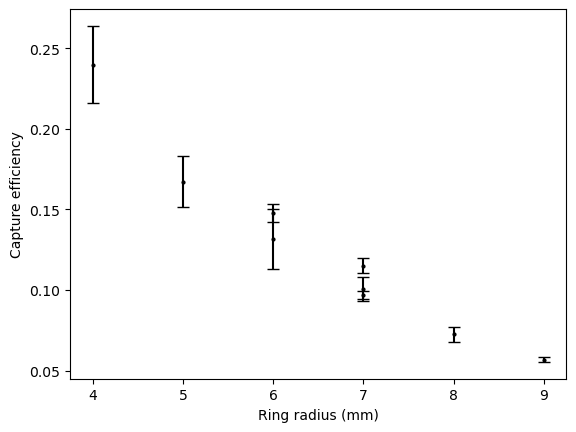

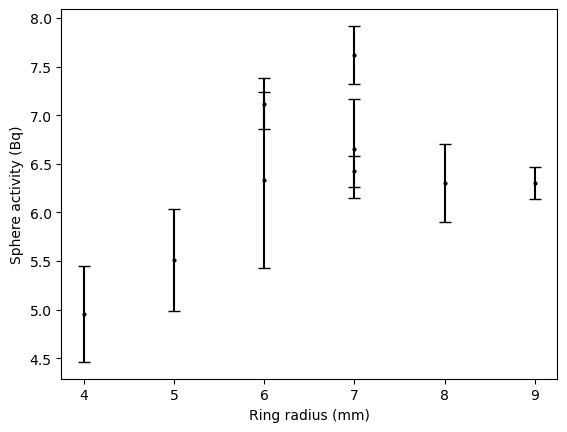

In [7]:
radius = np.array([6, 7, 5, 4, 8, 9, 7, 7, 6])
activity_in_cylinder = 2*57.5*np.pi*(radius-0.2)**2*10**(-9)*5000/0.001263
plt.figure()
plt.errorbar(radius, effs[:], yerr = errs, color = 'k', marker = 'o', markersize = 2, linestyle = 'None', capsize = 4)
plt.ylabel('Capture efficiency')
plt.xlabel('Ring radius (mm)')

plt.figure()
plt.errorbar(radius, effs[:]*activity_in_cylinder, yerr = errs*activity_in_cylinder, color = 'k', marker = 'o', markersize = 2, linestyle = 'None', capsize = 4)
plt.ylabel('Sphere activity (Bq)')
plt.xlabel('Ring radius (mm)')

In [8]:
base = 'C:/Users/Tom/Documents/Yale/SIMION/projects/data/'
files = ['set24', 'set25', 'set26', 'set27', 'set28', 'set29']
ftype = '.csv'
#filename = base+files[0]+ftype
#data = pd.read_csv(filename, names=list('abcdefghij')) 

In [9]:
effs = []
errs = []
for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    da = np.array([i for i in data.values[23:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
    da2 = np.array([i for i in data.values[24:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    for l in range(10):
        da_tmp = da[l*100:(l+1)*100]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[0]-6.5)**2 + (k[1]-6.5)**2 + k[2]**2)<1:
                i+=1
                if n != 0:
                    indices.append(n)
            else:
                j +=1
                if n != 0:
                    indices2.append(n)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(1))

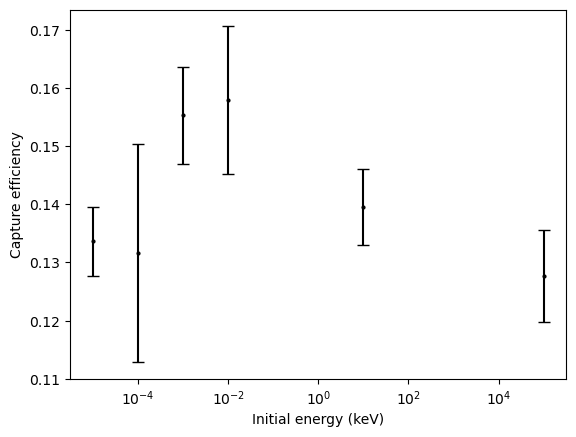

In [10]:
E_init = np.array([1e-4, 1e-5, 1e-3, 1e-2, 10, 1e5])
activity_in_cylinder = 2*57.5*np.pi*(radius-0.2)**2*10**(-9)*5000/0.001263
plt.figure()
plt.errorbar(E_init, effs[:], yerr = errs, color = 'k', marker = 'o', markersize = 2, linestyle = 'None', capsize = 4)
plt.ylabel('Capture efficiency')
plt.xlabel('Initial energy (keV)')
plt.xscale('log')

In [11]:
base = 'C:/Users/Tom/Documents/Yale/SIMION/projects/data/'
files = ['set29', 'set30', 'set35', 'set36', 'set37', 'set38', 'set39', 'set40', 'set41', 'set42', 'set43', 'set44']
ftype = '.csv'
#filename = base+files[0]+ftype
#data = pd.read_csv(filename, names=list('abcdefghij')) 

In [12]:
effs = []
errs = []
for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    if file == 'set30':
        
        da = np.array([i for i in data.values[32:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
        da2 = np.array([i for i in data.values[33:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
    else:
        da = np.array([i for i in data.values[23:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
        da2 = np.array([i for i in data.values[24:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    for l in range(10):
        da_tmp = da[l*100:(l+1)*100]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[0]-6.5)**2 + (k[1]-6.5)**2 + k[2]**2)<1:
                i+=1
                if n != 0:
                    indices.append(n)
            else:
                j +=1
                if n != 0:
                    indices2.append(n)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(1))

Text(0.5, 0, 'Offset voltage')

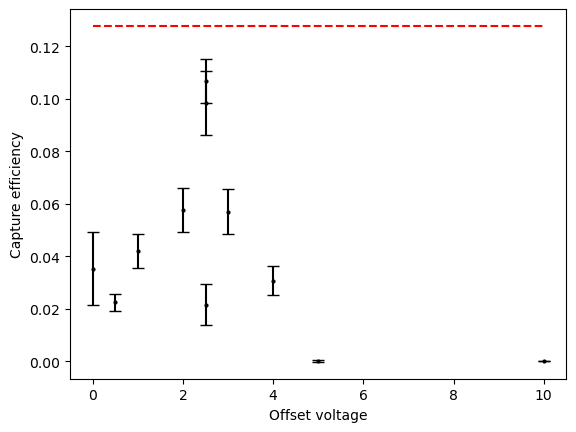

In [13]:
E_init = np.array([0, 0.5, 1, 10, 5, 2, 3, 4, 2.5, 2.5, 2.5])
activity_in_cylinder = 2*57.5*np.pi*(radius-0.2)**2*10**(-9)*5000/0.001263
plt.figure()
plt.errorbar(E_init, effs[1:], yerr = errs[1:], color = 'k', marker = 'o', markersize = 2, linestyle = 'None', capsize = 4)
plt.plot([E_init[0], E_init[3]], [effs[0], effs[0]], 'r--')
plt.ylabel('Capture efficiency')
plt.xlabel('Offset voltage')
#plt.xscale('log')

In [14]:
base = 'C:/Users/Tom/Documents/Yale/SIMION/projects/data/'
files = ['set44', 'set45', 'set46', 'set47']
ftype = '.csv'
#filename = base+files[0]+ftype
#data = pd.read_csv(filename, names=list('abcdefghij')) 

In [15]:
effs = []
errs = []
for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    if file == 'set30':
        
        da = np.array([i for i in data.values[32:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
        da2 = np.array([i for i in data.values[33:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
    else:
        da = np.array([i for i in data.values[23:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
        da2 = np.array([i for i in data.values[24:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    for l in range(10):
        da_tmp = da[l*100:(l+1)*100]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[0]-6.5)**2 + (k[1]-6.5)**2 + k[2]**2)<1:
                i+=1
                if n != 0:
                    indices.append(n)
            else:
                j +=1
                if n != 0:
                    indices2.append(n)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(1))

Text(0.5, 0, 'Offset voltage')

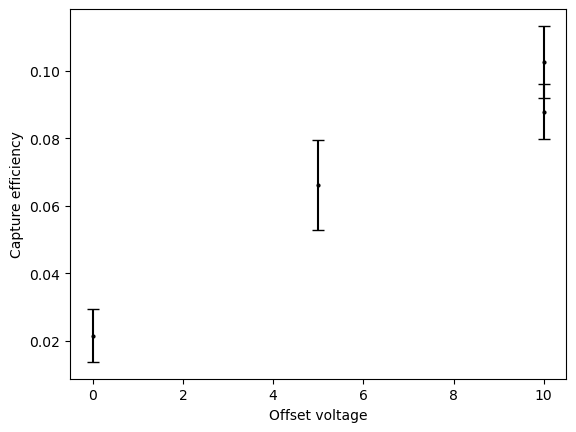

In [16]:
ring_num_AC = np.array([0, 5, 10, 10])
activity_in_cylinder = 2*57.5*np.pi*(radius-0.2)**2*10**(-9)*5000/0.001263
plt.figure()
plt.errorbar(ring_num_AC, effs[:], yerr = errs[:], color = 'k', marker = 'o', markersize = 2, linestyle = 'None', capsize = 4)
plt.ylabel('Capture efficiency')
plt.xlabel('Offset voltage')
#plt.xscale('log')

In [20]:
base = 'C:/Users/Tom/Documents/Yale/SIMION/projects/data/'
files = ['set50', 'set51', 'set52', 'set53', 'set54', 'set55', 'set56', 'set57', 'set58', 'set59', 'set60', 'set61', 'set62', 'set63', 'set76', 'set77', 'set78', 'set79', 'set80', 'set81', 'set82']
ftype = '.csv'
#filename = base+files[0]+ftype
#data = pd.read_csv(filename, names=list('abcdefghij')) 

In [21]:
effs = []
errs = []
for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    if file == 'set30':
        
        da = np.array([i for i in data.values[32:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
        da2 = np.array([i for i in data.values[33:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
    else:
        da = np.array([i for i in data.values[23:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
        da2 = np.array([i for i in data.values[24:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    for l in range(10):
        da_tmp = da[l*100:(l+1)*100]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[0]-6.5)**2 + (k[1]-6.5)**2 + k[2]**2)<1:
                i+=1
                if n != 0:
                    indices.append(n)
            else:
                j +=1
                if n != 0:
                    indices2.append(n)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(1))

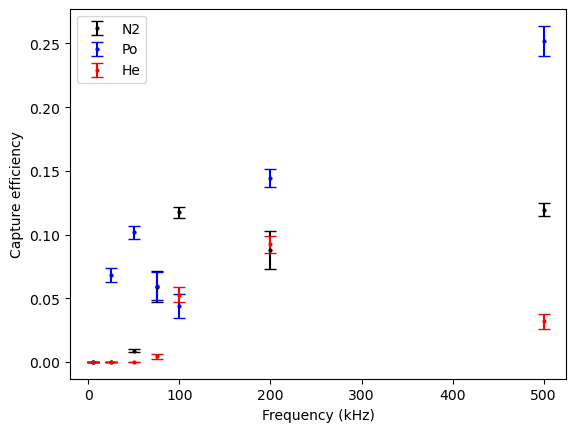

In [25]:
Freq = np.array([200, 100, 50, 25, 75, 5, 500])
Freq2 = np.array([75, 100, 50, 25, 500, 5])
Freq3 = np.array([200, 100, 75, 50, 25, 5, 500])
activity_in_cylinder = 2*57.5*np.pi*(radius-0.2)**2*10**(-9)*5000/0.001263
plt.figure()
plt.errorbar(Freq[:5], effs[1:6], yerr = errs[1:6], color = 'k', marker = 'o', markersize = 2, linestyle = 'None', capsize = 4)
plt.errorbar(Freq[5:], effs[12:14], yerr = errs[12:14], color = 'k', marker = 'o', markersize = 2, linestyle = 'None', capsize = 4, label = 'N2')
plt.errorbar(Freq[0], effs[0], yerr = errs[0], color = 'b', marker = 'o', markersize = 2, linestyle = 'None', capsize = 4, label = 'Po')
plt.errorbar(Freq2, effs[6:12], yerr = errs[6:12], color = 'b', marker = 'o', markersize = 2, linestyle = 'None', capsize = 4)
plt.errorbar(Freq3, effs[14:], yerr = errs[14:], color = 'r', marker = 'o', markersize = 2, linestyle = 'None', capsize = 4, label = 'He')
plt.ylabel('Capture efficiency')
plt.xlabel('Frequency (kHz)')
plt.legend()
#plt.ylim((0, 1))
#plt.xscale('log')

In [197]:
base = 'C:/Users/Tom/Documents/Yale/SIMION/projects/data/'
files = ['set64', 'set65', 'set66', 'set67', 'set68', 'set69', 'set70', 'set71', 'set72', 'set73', 'set74', 'set75']
ftype = '.csv'
#filename = base+files[0]+ftype
#data = pd.read_csv(filename, names=list('abcdefghij')) 

In [200]:
effs = []
errs = []
for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    if file == 'set30':
        
        da = np.array([i for i in data.values[32:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
        da2 = np.array([i for i in data.values[33:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
    else:
        da = np.array([i for i in data.values[23:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
        da2 = np.array([i for i in data.values[24:, 0:4] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, 1:]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    for l in range(10):
        da_tmp = da[l*100:(l+1)*100]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[0]-6.5)**2 + (k[1]-6.5)**2 + k[2]**2)<1:
                i+=1
                if n != 0:
                    indices.append(n)
            else:
                j +=1
                if n != 0:
                    indices2.append(n)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(1))

(0.0, 200.0)

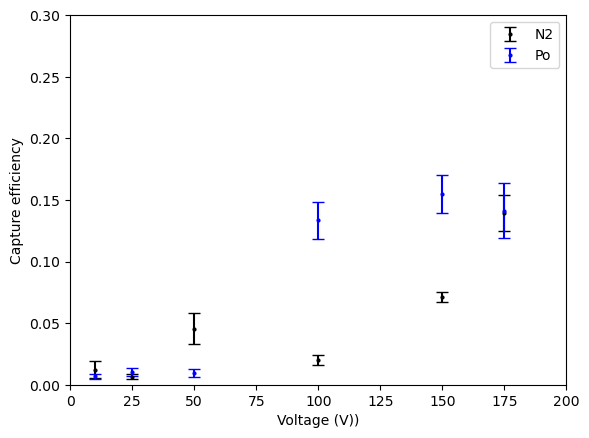

In [201]:
V = np.array([175, 100, 50, 25, 10, 150])
V2 = np.array([175, 150, 100, 50, 25, 10])
activity_in_cylinder = 2*57.5*np.pi*(radius-0.2)**2*10**(-9)*5000/0.001263
plt.figure()
plt.errorbar(V, effs[:6], yerr = errs[:6], color = 'k', marker = 'o', markersize = 2, linestyle = 'None', capsize = 4, label = 'N2')
plt.errorbar(V2, effs[6:], yerr = errs[6:], color = 'b', marker = 'o', markersize = 2, linestyle = 'None', capsize = 4, label = 'Po')
plt.ylabel('Capture efficiency')
plt.xlabel('Voltage (V))')
plt.legend()
plt.ylim((0, 0.3))
plt.xlim((0, 200))
#plt.xscale('log')

In [202]:
effs

[0.1394718253968254,
 0.020257142857142856,
 0.04547619047619048,
 0.006660317460317461,
 0.012140476190476191,
 0.07107777777777777,
 0.14139603174603174,
 0.15478571428571428,
 0.1335904761904762,
 0.009144047619047618,
 0.010509920634920636,
 0.007042998204667863]